<div style="color: white; background-color: Black; font-size: 28px; font-weight: bold; text-align: center; padding: 20px;">
CUSTOMER SENTIMENTAL ANALYSIS
</div>

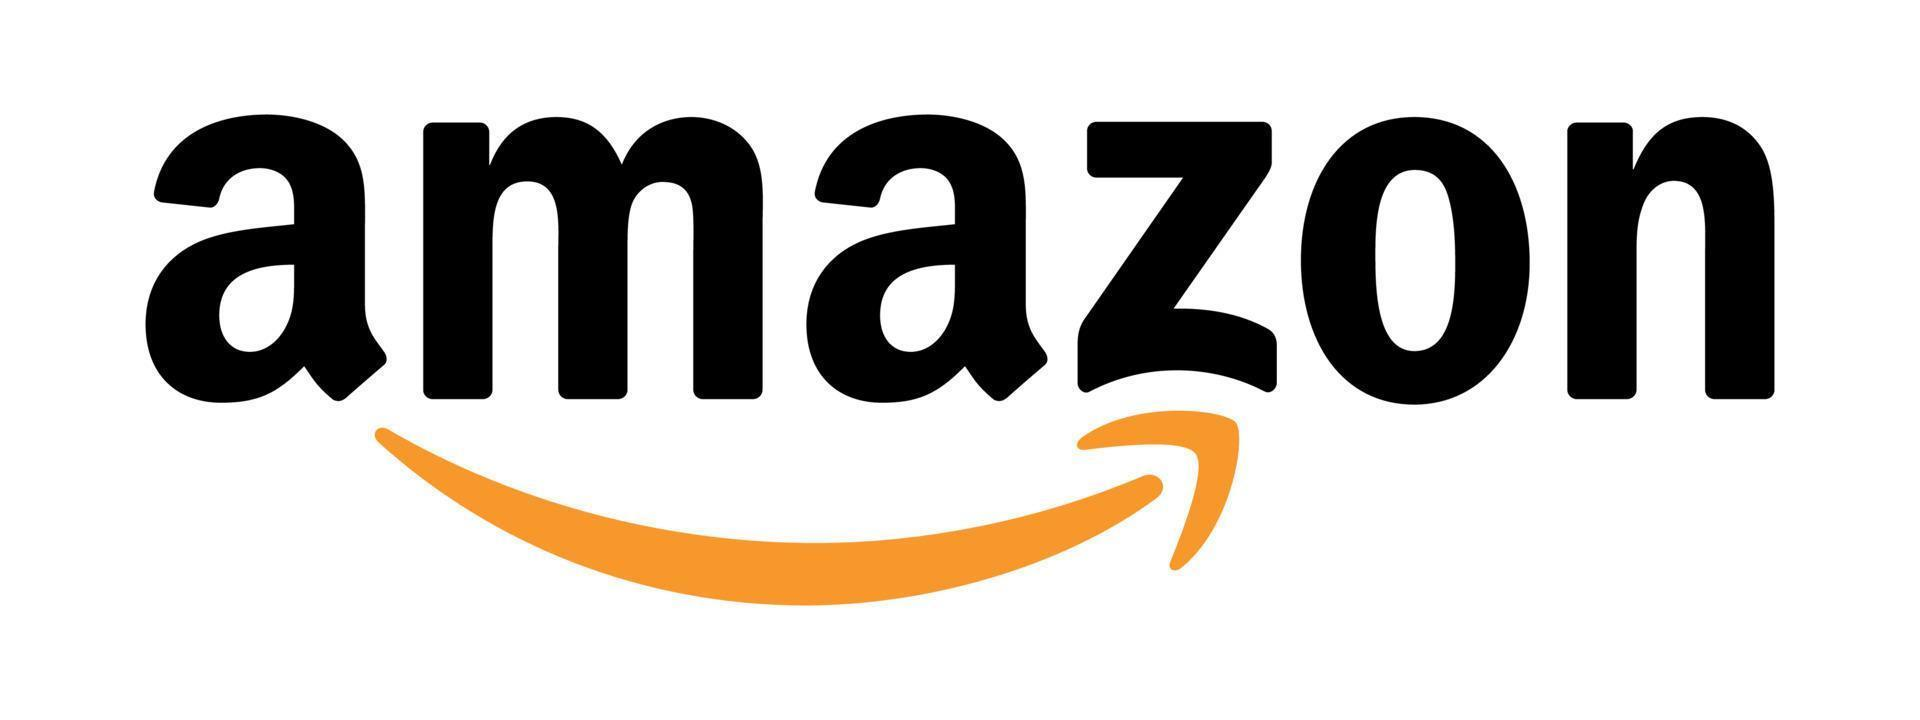


## PROJECT PROCESS:

* IMPORT LIBRARIES
* DATA LOADING
* DATA CLEANING
* EXPLORATARY DATA ANALYSIS
* PRE PROCESSING TEXT DATA
* POLARITY APPLYING
* NATURAL LANGUAGE PREPROCESSING
* MODEL BUILDING FOR ALGORITHEMS


## IMPORTING LIBRARIES:

In [2]:
# For data manipulation and analysis (handling dataframes, CSVs, etc.)
import pandas as pd

# For numerical operations (arrays, mathematical functions)
import numpy as np

# For data visualization (statistical plots)
import seaborn as sns

# For basic plotting (line, bar, histogram, etc.)
import matplotlib.pyplot as plt

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For evaluating the accuracy of classification models
from sklearn.metrics import accuracy_score

# For generating classification reports (precision, recall, F1-score)
from sklearn.metrics import classification_report, precision_score

# For text cleaning using regular expressions
import re

# For handling and manipulating strings (punctuation removal etc.)
import string

# Machine learning model for binary/multiclass classification
from sklearn.linear_model import LogisticRegression

# Ensemble model using multiple decision trees for classification
from sklearn.ensemble import RandomForestClassifier

# Probabilistic classifier based on Bayes theorem
from sklearn.naive_bayes import GaussianNB

# To convert text data into numerical features using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# For generating word clouds to visualize word frequency in text data
from wordcloud import WordCloud

## DATA LOADING:

In [3]:
data=pd.read_csv(r"C:\Users\GCE PMNA\Downloads\Women Dresses Reviews Dataset .csv")
data

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,44,General Petite,Dresses,Dresses,1081,Love it!,I oot this dress in the blue. it fits great--h...,0,5,1
23482,23482,39,General,Dresses,Dresses,1110,Great piece,I was very patient with this dress. i was wait...,1,5,1
23483,23483,29,General Petite,Tops,Knits,862,So soft and flattering,"The deep v doesn't gape, and flatters the neck...",0,5,1
23484,23484,57,General,Dresses,Dresses,1082,Another winner from isabella sinclair,"I saw this dress online this morning, went int...",10,5,1


## COLUMN DESCRIPTIONS:

1.s.no

 * Description: Serial number of the entry (index for the dataset)

 * Type: Integer

2. age

 * Description: Age of the reviewer

 * Type: Integer

3.division_name

 * Description: Name of the division the clothing item belongs to (e.g., General, General Petite, Initmates)

 * Type: Categorical (string)

4.department_name

 * Description: Name of the department (e.g., Tops, Bottoms, Intimate)

 * Type: Categorical (string)

5.class_name

 * Description: Specific clothing category or class (e.g., Blouses, Pants, Swim)

 * Type: Categorical (string)

6.clothing_id

 * Description: Unique identifier for the clothing item

 * Type: Integer

7.title

 * Description: Title of the review written by the customer

 * Type: Text (string)

8.review_text

 * Description: Full text of the customer review

 * Type: Text (string)

9.alike_feedback_count

 * Description: Number of users who found the review helpful

 * Type: Integer

10.rating

 * Description: Rating given by the customer (usually from 1 to 5)

 * Type: Integer

11.recommend_index (Note: column name has a trailing space)

 * Description: Indicates whether the customer recommends the product (1 = Yes, 0 = No)

 * Type: Integer (Binary)



## DATA CLEANING & PRE-PROCESSING:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   s.no                  23486 non-null  int64 
 1   age                   23486 non-null  int64 
 2   division_name         23472 non-null  object
 3   department_name       23472 non-null  object
 4   class_name            23472 non-null  object
 5   clothing_id           23486 non-null  int64 
 6   title                 19676 non-null  object
 7   review_text           22641 non-null  object
 8   alike_feedback_count  23486 non-null  int64 
 9   rating                23486 non-null  int64 
 10  recommend_index       23486 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
data.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [6]:
data.tail()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
23481,23481,44,General Petite,Dresses,Dresses,1081,Love it!,I oot this dress in the blue. it fits great--h...,0,5,1
23482,23482,39,General,Dresses,Dresses,1110,Great piece,I was very patient with this dress. i was wait...,1,5,1
23483,23483,29,General Petite,Tops,Knits,862,So soft and flattering,"The deep v doesn't gape, and flatters the neck...",0,5,1
23484,23484,57,General,Dresses,Dresses,1082,Another winner from isabella sinclair,"I saw this dress online this morning, went int...",10,5,1
23485,23485,56,General,Jackets,Jackets,984,NaN,Super cute jacket .perfect for fall i can't st...,0,5,1


In [7]:
data.columns

Index(['s.no', 'age', 'division_name', 'department_name', 'class_name',
       'clothing_id', 'title', 'review_text', 'alike_feedback_count', 'rating',
       'recommend_index '],
      dtype='object')

In [8]:
data.shape

(23486, 11)

In [9]:
data.isna().sum()

s.no                       0
age                        0
division_name             14
department_name           14
class_name                14
clothing_id                0
title                   3810
review_text              845
alike_feedback_count       0
rating                     0
recommend_index            0
dtype: int64

## EXPLORATORY DATA ANALYSIS (EDA):

### HEAT MAP

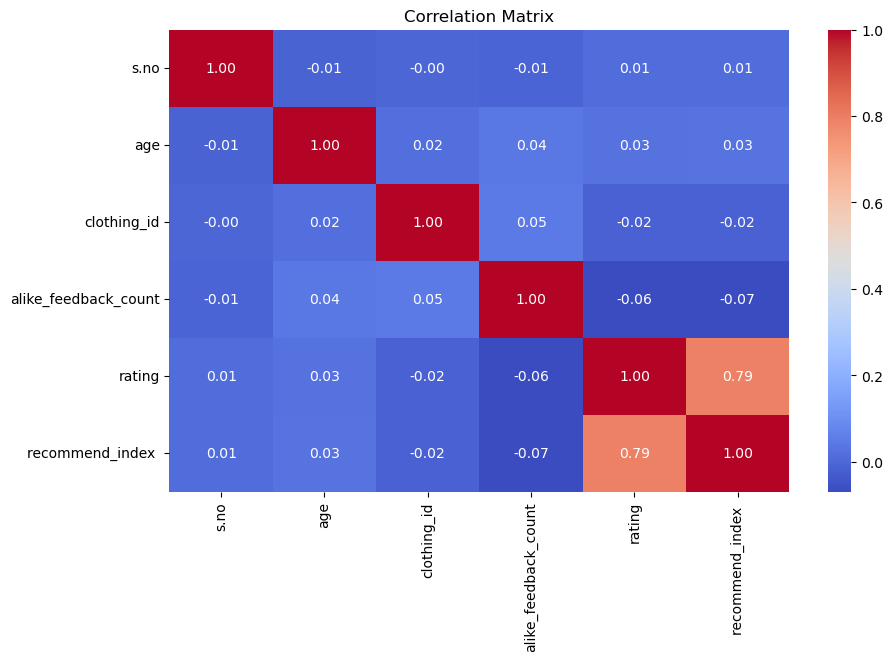

In [11]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10,6))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### COUNT PLOT

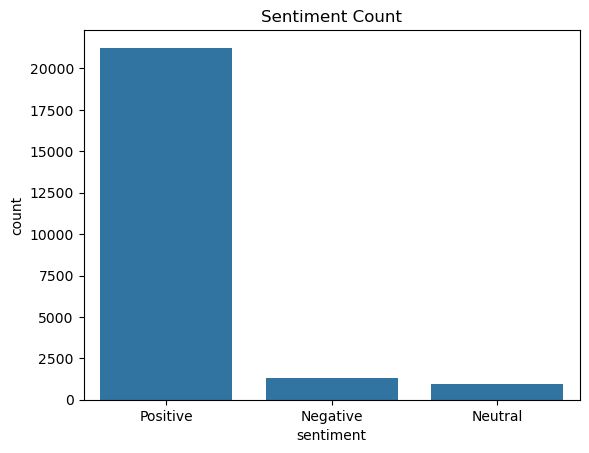

In [134]:
if 'sentiment' in data.columns:
    sns.countplot(x='sentiment', data=data)
    plt.title('Sentiment Count')
    plt.show()


### WORD CLOUD

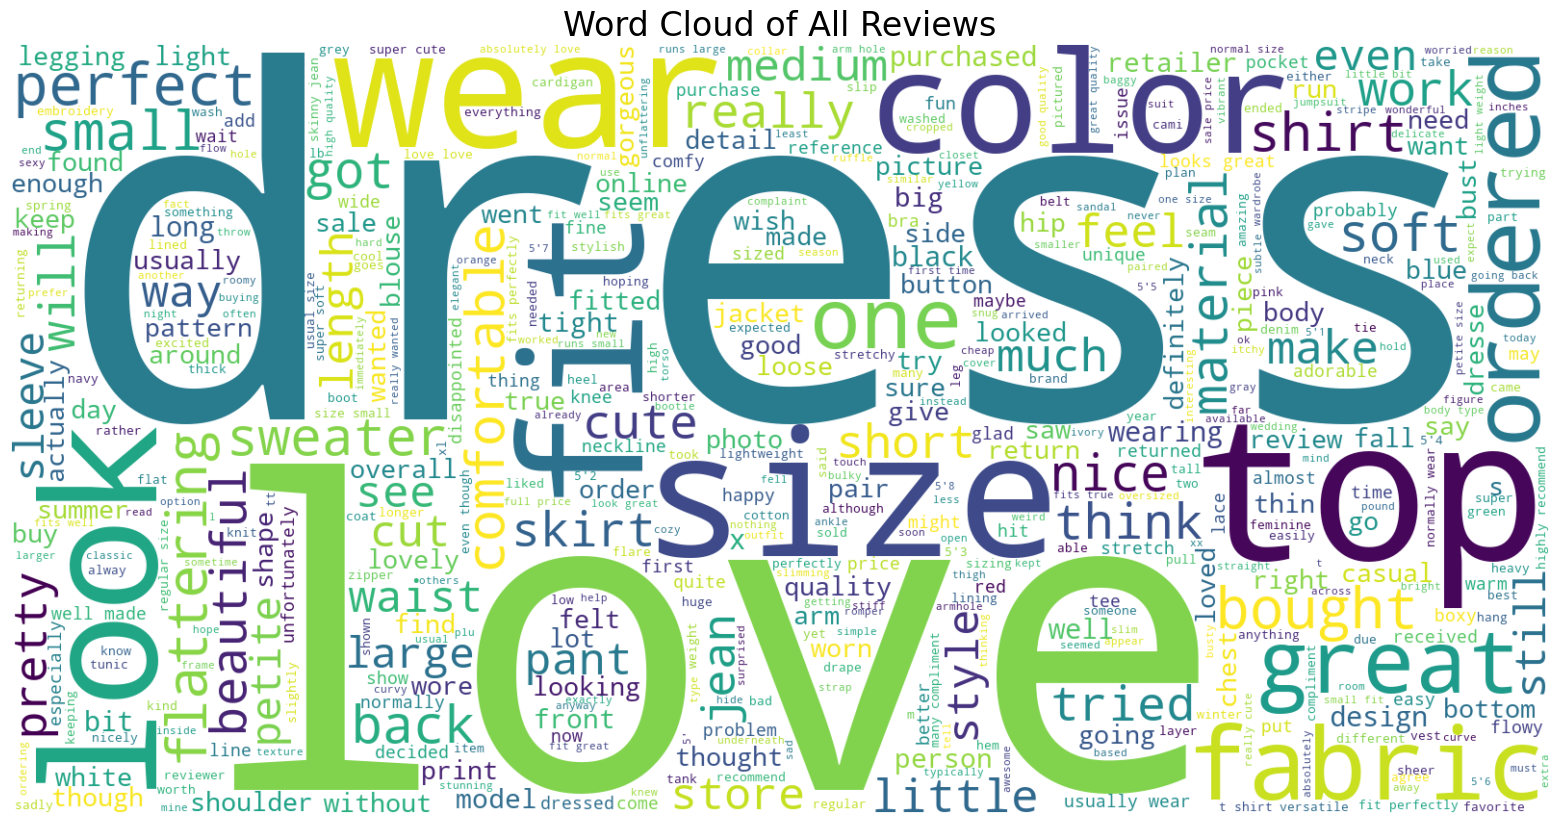

In [15]:
# 4. Combine all reviews into one big string
all_reviews = " ".join(
    data['review_text']
        .dropna()
        .astype(str)
        .tolist()
)

# 5. Generate & display the word cloud
wc = WordCloud(
    max_words=500,
    width=1600,
    height=800,
    background_color='white'
).generate(all_reviews)

plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Reviews", fontsize=24)
plt.show()

### PIE CHART

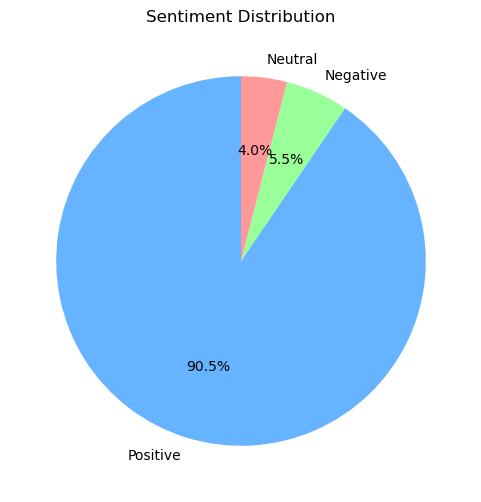

In [132]:
# Check the column name (assuming it’s called 'sentiment')
data['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6,6), colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Sentiment Distribution')
plt.ylabel('')  # Hide y-label for aesthetics
plt.show()

In [16]:
data=data.drop(['s.no','age','division_name','department_name','class_name','clothing_id','title','alike_feedback_count','rating'],axis=1)
data

,review_text,recommend_index
0,Like other reviewers i was hesitant to spend t...,1
1,As is true of a bunch of the fall clothing pho...,1
2,"I so wanted this skirt to work, love the desig...",0
3,Love love this! i was hesitant to buy this at ...,1
4,I absolutely love the retro look of this swims...,1
...,...,...
23481,I oot this dress in the blue. it fits great--h...,1
23482,I was very patient with this dress. i was wait...,1
23483,"The deep v doesn't gape, and flatters the neck...",1
23484,"I saw this dress online this morning, went int...",1


In [17]:
data.columns=["text","recommend"]
data

,text,recommend
0,Like other reviewers i was hesitant to spend t...,1
1,As is true of a bunch of the fall clothing pho...,1
2,"I so wanted this skirt to work, love the desig...",0
3,Love love this! i was hesitant to buy this at ...,1
4,I absolutely love the retro look of this swims...,1
...,...,...
23481,I oot this dress in the blue. it fits great--h...,1
23482,I was very patient with this dress. i was wait...,1
23483,"The deep v doesn't gape, and flatters the neck...",1
23484,"I saw this dress online this morning, went int...",1


## PREPROCESSING TEXT DATA:

In [19]:
data["text"]=data["text"].astype(str)

In [20]:
def wordopt(text): #creating function to process text
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\GCE PMNA\AppData\Local\Temp\ipykernel_6992\1462576528.py:3: SyntaxWarning: invalid escape sequence '\['
  text=re.sub('\[.*?\]','',text)
C:\Users\GCE PMNA\AppData\Local\Temp\ipykernel_6992\1462576528.py:5: SyntaxWarning: invalid escape sequence '\S'
  text=re.sub('https?://\S+|www\.\S+','',text)
C:\Users\GCE PMNA\AppData\Local\Temp\ipykernel_6992\1462576528.py:9: SyntaxWarning: invalid escape sequence '\w'
  text=re.sub('\w*\d\w*','',text)


In [21]:
data["text"]=data["text"].apply(wordopt)
data

,text,recommend
0,like other reviewers i was hesitant to spend t...,1
1,as is true of a bunch of the fall clothing pho...,1
2,i so wanted this skirt to work love the desig...,0
3,love love this i was hesitant to buy this at ...,1
4,i absolutely love the retro look of this swims...,1
...,...,...
23481,i oot this dress in the blue it fits great h...,1
23482,i was very patient with this dress i was wait...,1
23483,the deep v doesn t gape and flatters the neck...,1
23484,i saw this dress online this morning went int...,1


## POLARITY APPLYING:

### TEXT BLOB

In [22]:

from textblob import TextBlob

In [23]:
# Function to calculate polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

data['polarity'] = data['text'].apply(get_polarity)

# Classify sentiment
def get_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment'] = data['polarity'].apply(get_sentiment)

print(data)

                                                    text  recommend  polarity  \
0      like other reviewers i was hesitant to spend t...          1  0.337500   
1      as is true of a bunch of the fall clothing pho...          1  0.252083   
2      i so wanted this skirt to work  love the desig...          0  0.066667   
3      love love this  i was hesitant to buy this at ...          1  0.382292   
4      i absolutely love the retro look of this swims...          1  0.173333   
...                                                  ...        ...       ...   
23481  i oot this dress in the blue  it fits great  h...          1  0.291667   
23482  i was very patient with this dress  i was wait...          1  0.385159   
23483  the deep v doesn t gape  and flatters the neck...          1  0.254571   
23484  i saw this dress online this morning  went int...          1  0.227855   
23485  super cute jacket  perfect for fall i can t st...          1  0.611111   

      sentiment  
0      Po

In [24]:
data.head()

,text,recommend,polarity,sentiment
0,like other reviewers i was hesitant to spend t...,1,0.337500,Positive
1,as is true of a bunch of the fall clothing pho...,1,0.252083,Positive
2,i so wanted this skirt to work love the desig...,0,0.066667,Positive
3,love love this i was hesitant to buy this at ...,1,0.382292,Positive
4,i absolutely love the retro look of this swims...,1,0.173333,Positive


In [25]:
data.sample(frac=1)

,text,recommend,polarity,sentiment
22239,these cords are beautiful in the wine color an...,1,0.127083,Positive
23242,i love this blouse it looks great under a bla...,1,0.370822,Positive
10437,i ordered this in lime which is one of my fav...,0,0.019918,Positive
15250,this is a very chic tunic sweater i absolutel...,1,0.208315,Positive
9533,i m lbs cup slender throughout size ...,1,0.466667,Positive
...,...,...,...,...
2651,i bought this dress for an awards ceremony an...,1,0.323810,Positive
3522,this dress runs very large i am usually wear ...,1,0.228027,Positive
18398,the pattern attracted me to this top in store ...,1,0.157568,Positive
23100,i was looking for a coat to wear over dresses ...,1,0.666667,Positive


## DATA SPLITTING:

In [27]:
x=data['text']
y=data['sentiment']
print(x)
print(y)

0        like other reviewers i was hesitant to spend t...
1        as is true of a bunch of the fall clothing pho...
2        i so wanted this skirt to work  love the desig...
3        love love this  i was hesitant to buy this at ...
4        i absolutely love the retro look of this swims...
                               ...                        
23481    i oot this dress in the blue  it fits great  h...
23482    i was very patient with this dress  i was wait...
23483    the deep v doesn t gape  and flatters the neck...
23484    i saw this dress online this morning  went int...
23485    super cute jacket  perfect for fall i can t st...
Name: text, Length: 23486, dtype: object
0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
23481    Positive
23482    Positive
23483    Positive
23484    Positive
23485    Positive
Name: sentiment, Length: 23486, dtype: object


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [29]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(17614,) (5872,) (17614,) (5872,)


## NATURAL LANGUAGE PROCESSING:

In [31]:
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train) #train-fit
xv_test=vectorization.transform(x_test)#test-transform

In [32]:
xv_train

<17614x11980 sparse matrix of type '<class 'numpy.float64'>'
	with 718336 stored elements in Compressed Sparse Row format>

In [33]:
xv_train.shape

(17614, 11980)

In [34]:
xv_test.shape

(5872, 11980)

## MODEL BUILDING ALGORITHEMS:

### LOGISTIC REGRESSION

In [37]:
LR=LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [38]:
pred_lr1=LR.predict(xv_test)
pred_lr1

array(['Positive', 'Positive', 'Neutral', ..., 'Negative', 'Positive',
       'Positive'], dtype=object)

In [39]:
pred_lr2=LR.predict(xv_train)
pred_lr2

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [40]:
# model validation checking
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report

In [41]:
print(confusion_matrix(y_test,pred_lr1))

[[  56    0  252]
 [   0  222   22]
 [   5    0 5315]]


In [42]:
print(confusion_matrix(y_train,pred_lr2))

[[  322     0   661]
 [    0   623    74]
 [    7     0 15927]]


In [43]:
print(accuracy_score(y_test,pred_lr1))

0.9524863760217984


In [44]:
print(accuracy_score(y_train,pred_lr2))

0.9578744180765301


## NAIVE BAYES THEOREM:

### MultinomialNB

In [47]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(xv_train,y_train)
predict1 = model1.predict(xv_test)
predict1

array(['Positive', 'Positive', 'Neutral', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [48]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model2.fit(xv_train,y_train)
predict2 = model2.predict(xv_train)
predict2

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [49]:
print(accuracy_score(y_test,predict1))

0.9438010899182562


In [50]:
print(accuracy_score(y_train,predict2))

0.9399909163165664


### BernoulliNB

In [52]:
from sklearn.naive_bayes import BernoulliNB
model3 = BernoulliNB()
model3.fit(xv_train,y_train)
predict3 = model3.predict(xv_test)
predict3

array(['Positive', 'Positive', 'Neutral', ..., 'Neutral', 'Positive',
       'Positive'], dtype='<U8')

In [53]:
from sklearn.naive_bayes import BernoulliNB
model4 = BernoulliNB()
model4.fit(xv_train,y_train)
predict4 = model4.predict(xv_train)
predict4

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [54]:
print(accuracy_score(y_test,predict3))

0.9356267029972752


In [55]:
print(accuracy_score(y_train,predict4))

0.9376632224366981
